## Loading the Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("job_skills.csv")

In [5]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [6]:
df.describe().T

,count,unique,top,freq
Company,1250,2,Google,1227
Title,1250,794,Business Intern 2018,35
Category,1250,23,Sales & Account Management,168
Location,1250,92,"Mountain View, CA, United States",190
Responsibilities,1235,801,Responsibilities and detailed projects will be...,33
Minimum Qualifications,1236,807,Must be pursuing a full-time MBA program with ...,32
Preferred Qualifications,1236,821,"Previous internship experience in Sales, Adver...",32


In [7]:
df.shape

(1250, 7)

## Data Cleaning

Removing Missing Values

In [8]:
df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [9]:
df = df.dropna(how='any',axis='rows')

In [10]:
df.isnull().sum()

Company                     0
Title                       0
Category                    0
Location                    0
Responsibilities            0
Minimum Qualifications      0
Preferred Qualifications    0
dtype: int64

Tokenize

In [12]:
import nltk
nltk.download('punkt')
  
from nltk.tokenize import word_tokenize 

df['Responsibilities'] = df.Responsibilities.apply(lambda x: word_tokenize(x))
df['Minimum Qualifications'] = df['Minimum Qualifications'].apply(lambda x: word_tokenize(x))
df['Preferred Qualifications'] = df['Preferred Qualifications'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Onur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Removing Stopwords

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['Responsibilities'] = df['Responsibilities'].apply(lambda x: [w for w in x if w not in stop_words])
df['Minimum Qualifications'] = df['Minimum Qualifications'].apply(lambda x: [w for w in x if w not in stop_words])
df['Preferred Qualifications'] = df['Preferred Qualifications'].apply(lambda x: [w for w in x if w not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Onur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Split

In [15]:
df['Preferred Qualifications'] = df['Preferred Qualifications'].apply(lambda x: ' '.join(x))
df['Minimum Qualifications'] = df['Minimum Qualifications'].apply(lambda x: ' '.join(x))
df['Preferred Qualifications'] = df['Preferred Qualifications'].apply(lambda x: ' '.join(x))

# Which qualifications are requested by Google

## 1- Language

In [16]:
programing_language_list = ['go','r', 'sas', 'matlab','stata','python', 'java','net', 'c++','html','css', 'php', \
                            'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','mysql','mapreduce','hadoop','kotlin']

In [17]:
min_qualifications = df['Minimum Qualifications'].tolist()
min_qualifications_string = ''.join(map(str, min_qualifications)).lower()

In [20]:
import re
languages_count = dict((keys,0) for keys in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", min_qualifications_string):
    if w in languages_count:
        languages_count[w] += 1

print(languages_count)

{'go': 26, 'r': 37, 'sas': 18, 'matlab': 20, 'stata': 11, 'python': 97, 'java': 76, 'net': 12, 'c++': 54, 'html': 36, 'css': 22, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 33, 'c#': 0, 'sql': 73, 'mysql': 9, 'mapreduce': 8, 'hadoop': 8, 'kotlin': 3}


In [21]:
popular_languages = pd.DataFrame(languages_count.items(), columns=['Language', 'Popularity'])

In [22]:
popular_languages.head()

,Language,Popularity
0,go,26
1,r,37
2,sas,18
3,matlab,20
4,stata,11


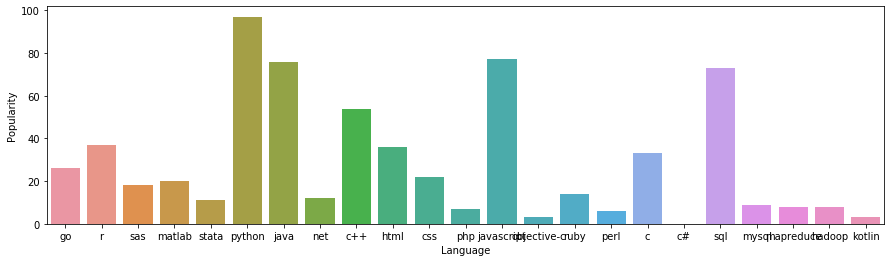

In [43]:
plt.figure(figsize=(15,4))
sns.barplot(x = "Language" , y = "Popularity"  ,data = popular_languages )

<Figure size 2520x1728 with 0 Axes>

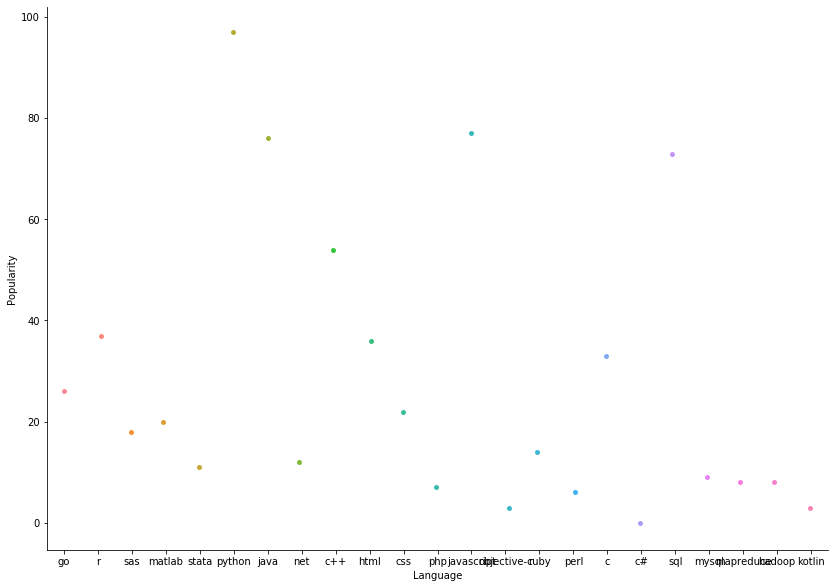

In [25]:
plt.figure(figsize=(35,24))
sns.catplot(x = "Language" , y = "Popularity" , data = popular_languages ,height=8.27, aspect=11.7/8.27)

## 2 - Location

Country

In [26]:
df["Location"].head()

0                           Singapore
1                     Shanghai, China
2         New York, NY, United States
3    Mountain View, CA, United States
4        Sunnyvale, CA, United States
Name: Location, dtype: object

In [27]:
df["Country"] = df["Location"].str.split(',').str[-1]

In [28]:
country_value_counts = df.Country.value_counts()
country_value_counts= country_value_counts[country_value_counts.values>=10]

In [29]:
df_popular_countries=pd.Series.to_frame(country_value_counts).reset_index()
df_popular_countries.columns=['Country', 'Preference']
df_popular_countries.head()

,Country,Preference
0,United States,624
1,Ireland,87
2,United Kingdom,62
3,Germany,53
4,Singapore,41


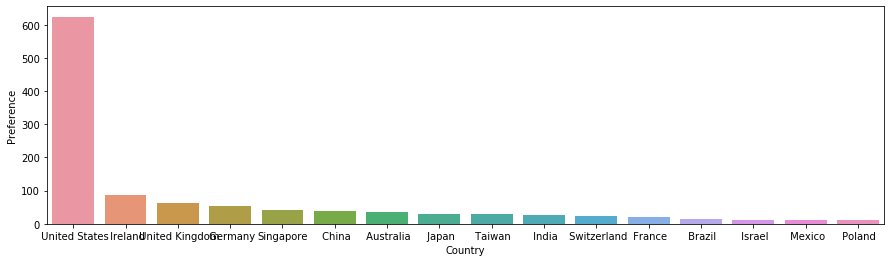

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(x = "Country" , y = "Preference"  ,data = df_popular_countries )

City

In [31]:
df["City"] = df["Location"].str.split(',').str[0]
df["City"].head()

0        Singapore
1         Shanghai
2         New York
3    Mountain View
4        Sunnyvale
Name: City, dtype: object

In [32]:
city_value_counts = df.City.value_counts()
city_value_counts= city_value_counts[city_value_counts.values>=10]

In [33]:
df_popular_cities=pd.Series.to_frame(city_value_counts).reset_index()
df_popular_cities.columns=['City', 'Preference']
df_popular_cities.head()

,City,Preference
0,Mountain View,187
1,Sunnyvale,155
2,Dublin,87
3,New York,70
4,London,62


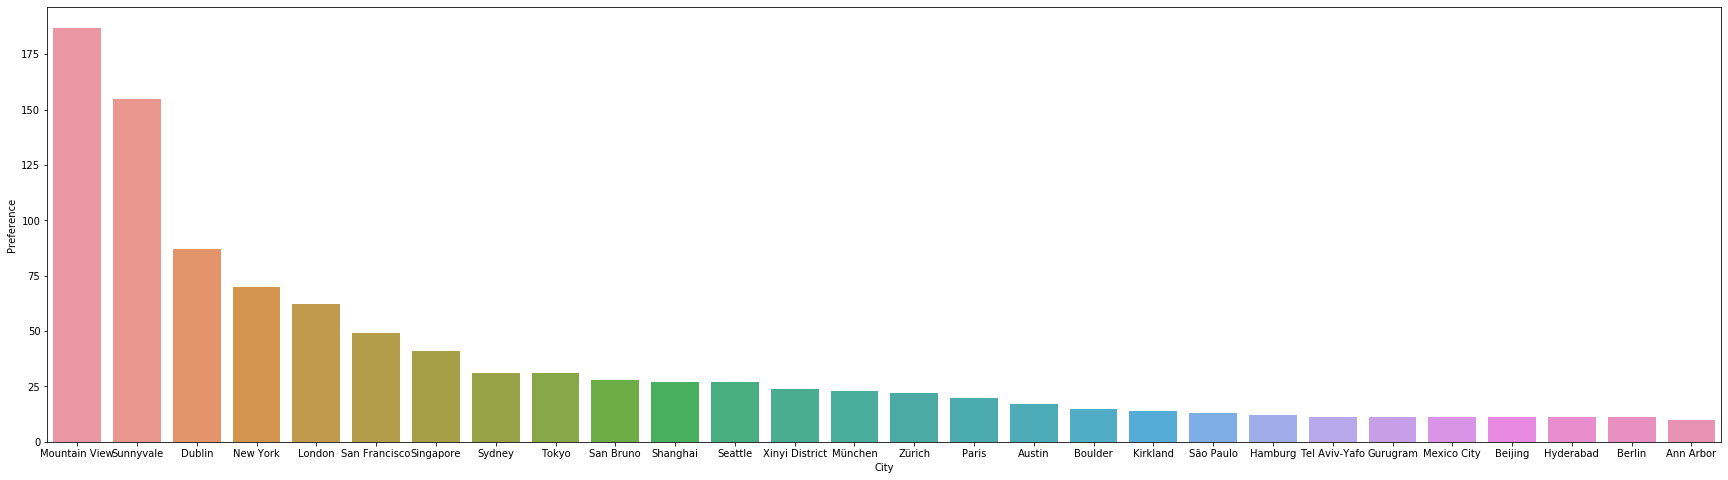

In [34]:
plt.figure(figsize=(30,8))
sns.barplot(x = "City" , y = "Preference"  ,data = df_popular_cities )

## 3 - Degree

In [35]:
degree_list = ["ba", "bs", "bachelor's", "phd",'mba','bachelor','student' ]


In [36]:
degree_count = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", min_qualifications_string):
    if w in degree_count:
        degree_count[w] += 1
# print
print(degree_count)

{'ba': 808, 'bs': 878, "bachelor's": 0, 'phd': 8, 'mba': 73, 'bachelor': 164, 'student': 60}


In [37]:
df_degree_popular = pd.DataFrame.from_dict(degree_count, orient='index').sort_values(by=0,ascending=False).reset_index()
df_degree_popular.columns=['Degree', 'Popularity']
df_degree_popular['Degree'] = df_degree_popular.Degree.str.upper() 
df_degree_popular

,Degree,Popularity
0,BS,878
1,BA,808
2,BACHELOR,164
3,MBA,73
4,STUDENT,60
5,PHD,8
6,BACHELOR'S,0


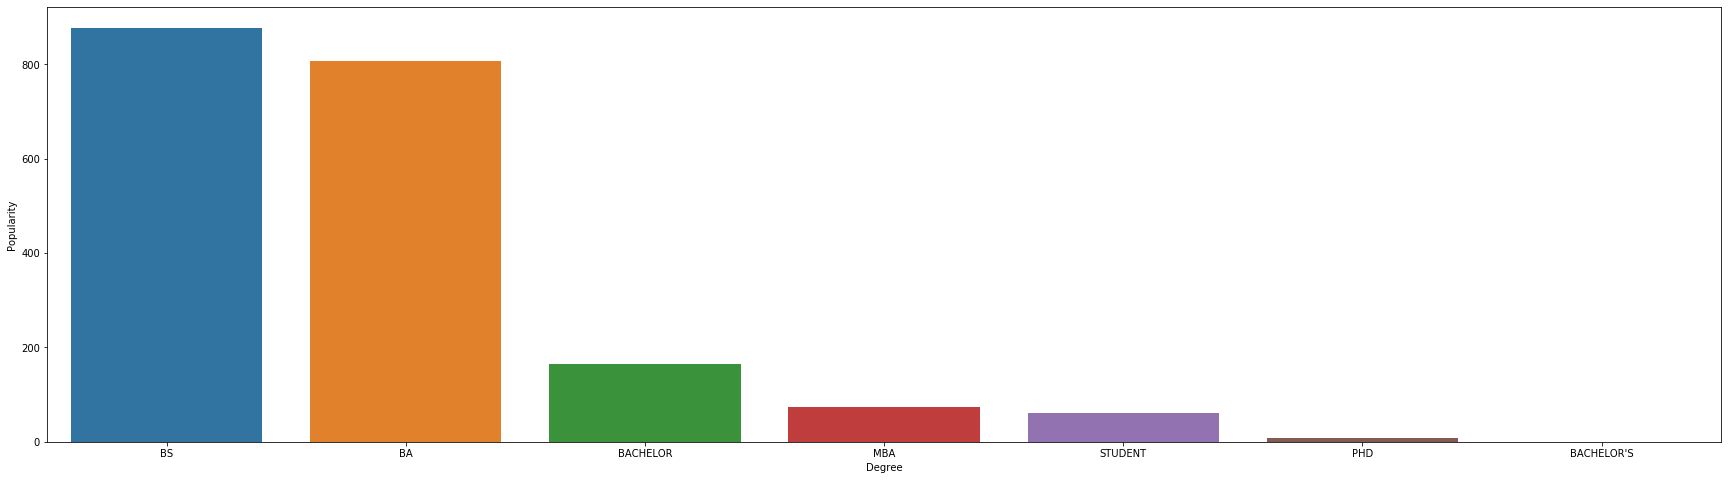

In [38]:
plt.figure(figsize=(30,8))
sns.barplot(x = "Degree" , y = "Popularity"  ,data = df_degree_popular )

## 4 - Years of Experience

In [39]:
from collections import defaultdict
years_exp = defaultdict(lambda: 0)
for w in re.findall(r'([0-9]+) year', min_qualifications_string):
     years_exp[w] += 1
        
print(years_exp)

df_years_exp = pd.DataFrame.from_dict(years_exp, orient='index').sort_values(by=0,ascending=False).reset_index()
df_years_exp.columns=['Years of Experience', 'Popularity'] 

df_years_exp.head()

defaultdict(<function <lambda> at 0x0000019F77BBA0D8>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


,Years of Experience,Popularity
0,5,181
1,3,114
2,4,92
3,10,76
4,8,65


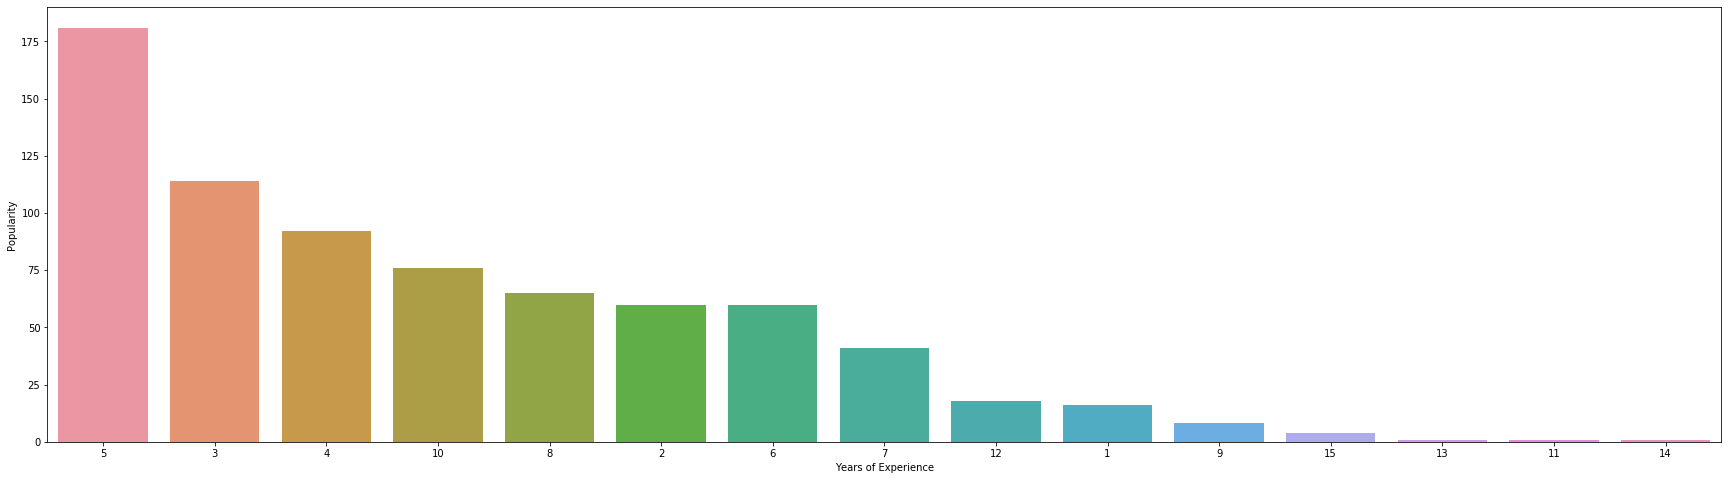

In [40]:
plt.figure(figsize=(30,8))
sns.barplot(x = "Years of Experience" , y = "Popularity"  ,data = df_years_exp ,order = df_years_exp['Years of Experience'] )

## 5 - Popular Category

In [41]:
category_value_counts = df.Category.value_counts()

df_popular_category=pd.Series.to_frame(category_value_counts).reset_index()
df_popular_category.columns=['Category', 'Preference']
df_popular_category.head()

,Category,Preference
0,Sales & Account Management,168
1,Marketing & Communications,165
2,Finance,115
3,Technical Solutions,100
4,Business Strategy,98


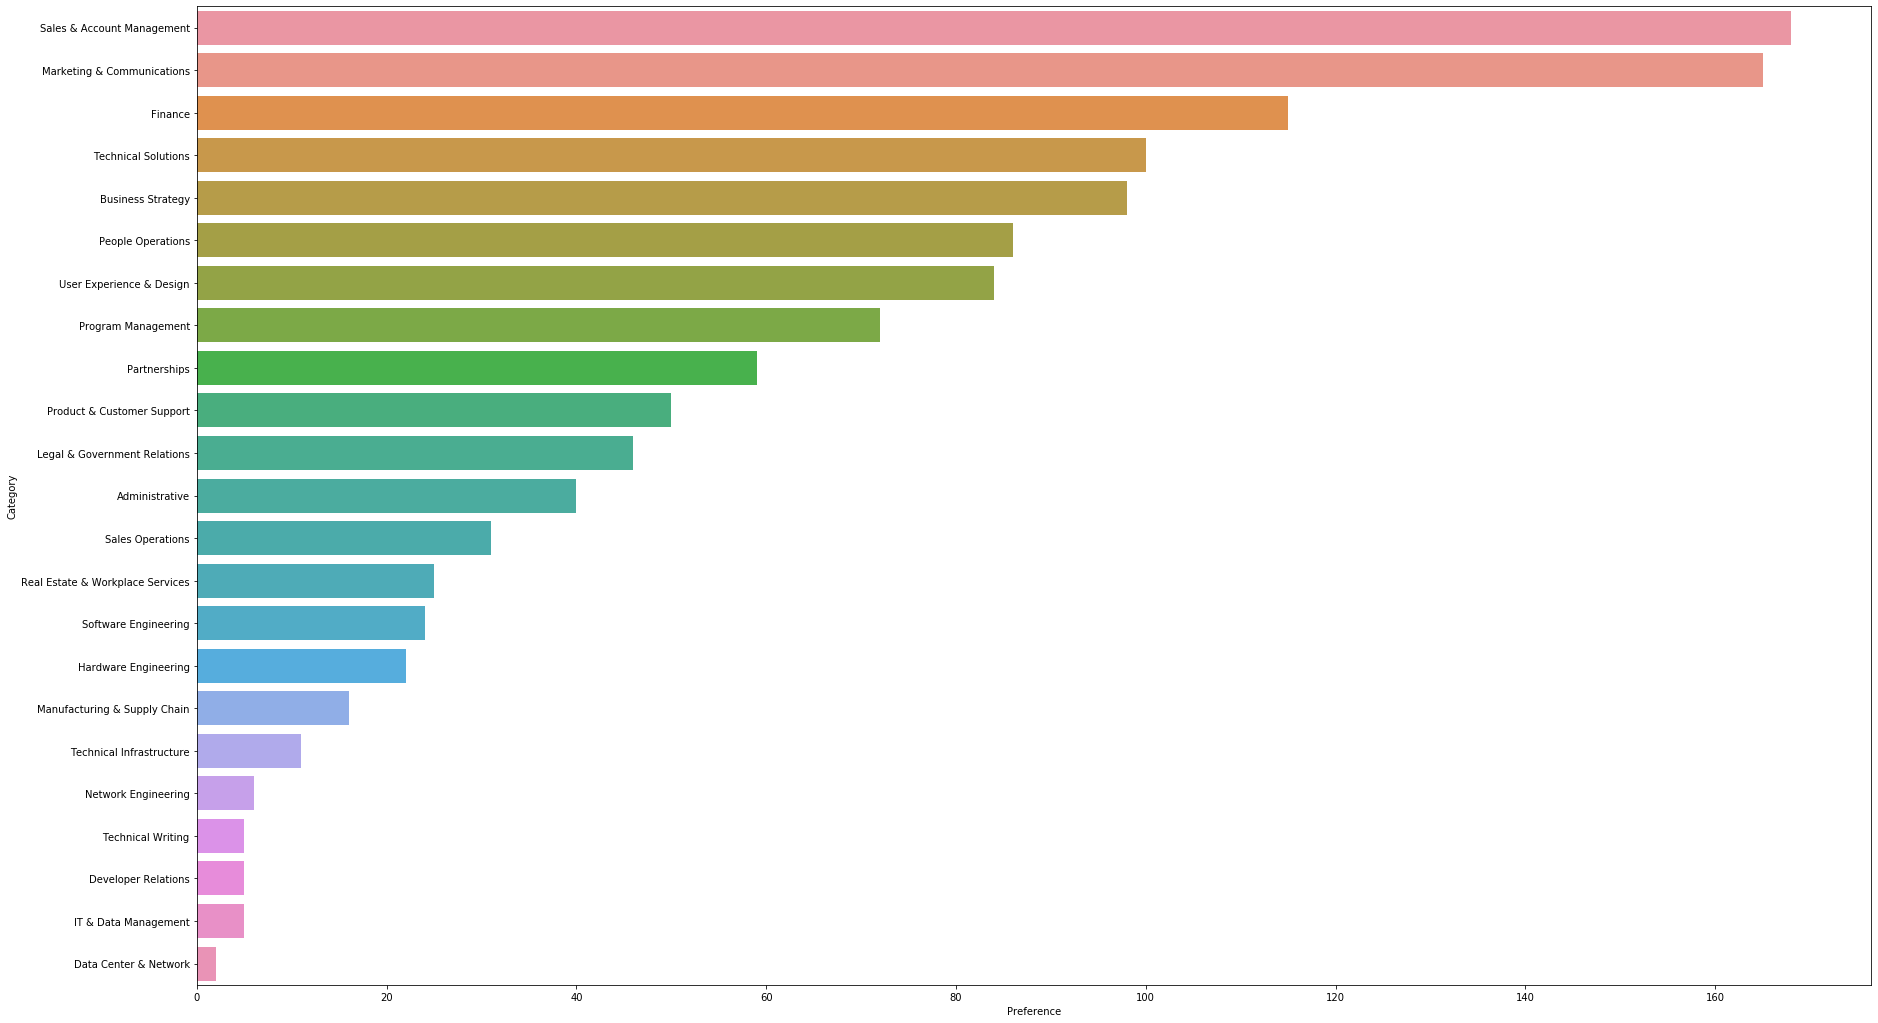

In [42]:
plt.figure(figsize=(30,18))
sns.barplot(x = "Preference" , y = "Category"  ,data = df_popular_category )